In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Input, Concatenate, Flatten, BatchNormalization, Add, Activation, GlobalAveragePooling2D
from keras.layers import Dense, Conv2D, MaxPooling2D, Rescaling, RandomFlip, RandomTranslation, RandomContrast
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import os

REPO_NAME = "AA-II-RodriguezyBarros-Herrera-Zahradnicek"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/franciscoryb1/AA-II-RodriguezyBarros-Herrera-Zahradnicek
  os.chdir(REPO_NAME)

Cloning into 'AA-II-RodriguezyBarros-Herrera-Zahradnicek'...
remote: Enumerating objects: 24314, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 24314 (delta 0), reused 1 (delta 0), pack-reused 24312 (from 2)
Receiving objects: 100% (24314/24314), 342.26 MiB | 27.40 MiB/s, done.
Updating files: 100% (24337/24337), done.


In [3]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Problema 1

## Descripción:
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

Dataset:
https://drive.google.com/file/d/1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc/view?usp=drive_link

El dataset proporcionado incluye las siguientes variables para cada estudiante:
Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.

* Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
* Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
* Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
* Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
Además, el dataset incluye la variable objetivo:
* Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.


Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.

## Entrega:
La entrega debe incluir:

* Código fuente de la solución implementada en Google Colab, que incluya:
Análisis previo y preprocesamiento del set de datos.
* Definición y entrenamiento del modelo.
* Resultados de la evaluación del modelo, incluyendo métricas de desempeño y visualizaciones relevantes.

Nota: el código debe estar debidamente documentado con comentarios explicativos para que el trabajo sea fácilmente comprensible para otros revisores.


In [ ]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Problema 3
## Descripción:
En este problema, se proporciona un conjunto de datos que contiene imágenes de escenas naturales de todo el mundo. El objetivo es construir un modelo de clasificación utilizando redes neuronales convolucionales (CNN) para clasificar estas imágenes en una de las seis categorías predefinidas.

Dataset:
https://drive.google.com/file/d/1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ/view?usp=drive_link

El dataset proporcionado contiene alrededor de 25,000 imágenes de tamaño 150x150, distribuidas en seis categorías:

* **buildings**
* **forest**
* **glacier**
* **mountain**
* **sea**
* **street**

Las imágenes están divididas en tres conjuntos:

* **Train**: Alrededor de 14,000 imágenes para entrenamiento.
* **Test**: Alrededor de 3,000 imágenes para evaluación del modelo.
* **Prediction**: Alrededor de 7,000 imágenes para predicción final.

## Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir y comparar el rendimiento de distintos modelos de clasificación de imágenes utilizando redes neuronales convolucionales y densas que puedan clasificar con precisión las imágenes de escenas naturales en una de las seis categorías mencionadas anteriormente.
Los modelos a diseñar son:

* Modelo con capas densas.
* Modelo con capas convolucionales y densas.
* Modelo que incluya bloques residuales identidad
* Modelo que utilice como backbone alguna de las arquitecturas disponibles en TensorFlow (transfer learning): https://www.tensorflow.org/api_docs/python/tf/keras/applications

Se debe entrenar y evaluar cada modelo utilizando técnicas adecuadas de validación y métricas de evaluación de clasificación.

## Entrega:
La entrega debe incluir:

* Código fuente de la solución implementada en Google Colab, que incluya:
* Análisis previo y preprocesamiento del set de datos.
* Definición y entrenamiento del modelo.
* Resultados de la evaluación del modelo, incluyendo métricas de desempeño y visualizaciones relevantes.

Nota: el código debe estar debidamente documentado con comentarios explicativos para que el trabajo sea fácilmente comprensible para otros revisores.


## Datasets

In [4]:
# Directorios de los datos
TRAIN_DIRECTORY = Path('train/seg_train')
TEST_DIRECTORY = Path('test/seg_test')
PREDICTION_DIRECTORY = Path('pred/seg_pred')

# Tamaño del lote (batch size)
BATCH_SIZE = 64

# Tamaño de las imágenes
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32

# Carga los datos de train, test y prediction
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIRECTORY,
    label_mode="categorical",
    seed=42,
    shuffle=True,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIRECTORY,
    label_mode="categorical",
    seed=42,
    shuffle=True,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

prediction_ds = tf.keras.utils.image_dataset_from_directory(
    PREDICTION_DIRECTORY,
    label_mode=None,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Found 7301 files.


In [5]:
# Obtiene los nombres de las clases
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


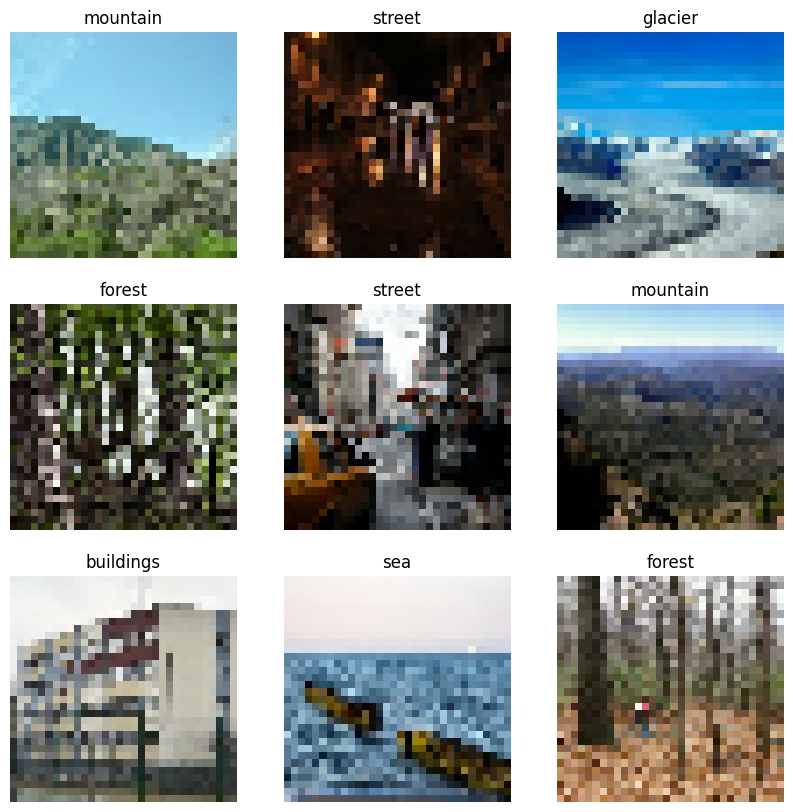

In [6]:
# Muestra algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    class_idx = list(labels[i]).index(1)
    plt.title(class_names[class_idx])
    plt.axis("off")

In [7]:
train_ds.map(lambda x, y: (x / 255.0, y))
test_ds.map(lambda x, y: (x / 255.0, y))

<_MapDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [8]:
train_ds = train_ds.shuffle(buffer_size=14000, seed=42).prefetch(buffer_size=tf.data.AUTOTUNE)

## Modelo con capas densas.

In [14]:
# Definimos el modelo.
model = Sequential([
    Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),

    Dense(186),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),

    Dense(6, activation='softmax')
])

In [15]:
model.summary()
num_params = model.count_params()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 186)            │       571,578 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 186)            │           744 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 186)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 186)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        11,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,864 (2.26 MB)

 Trainable params: 591,140 (2.26 MB)

 Non-trainable params: 724 (2.83 KB)

In [16]:
early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=0, mode="min")
checkpoint_acc = ModelCheckpoint(
    "best_dense_model.keras",
    save_best_only=True,
    monitor="val_accuracy",
    initial_value_threshold=0.58,
    mode="max",
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=4, verbose=0, min_delta=1e-4, mode="min", min_lr=3.1250e-05)

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'])

# Número de épocas de entrenamiento
EPOCHS = 50
# Entrena el modelo
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[checkpoint_acc, early_stopping, reduce_lr]
)

Epoch 1/150
220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.2220 - loss: 1.8292 - val_accuracy: 0.4257 - val_loss: 1.4359 - learning_rate: 0.0010
Epoch 2/150
220/220 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4144 - loss: 1.4960 - val_accuracy: 0.4827 - val_loss: 1.3486 - learning_rate: 0.0010
Epoch 3/150
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4669 - loss: 1.3746 - val_accuracy: 0.5153 - val_loss: 1.2572 - learning_rate: 0.0010
Epoch 4/150
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4882 - loss: 1.3228 - val_accuracy: 0.5263 - val_loss: 1.2052 - learning_rate: 0.0010
Epoch 5/150
220/220 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5119 - loss: 1.2776 - val_accuracy: 0.5317 - val_loss: 1.2092 - learning_rate: 0.0010
Epoch 6/150
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5313 - loss: 1.2345 - val_accuracy: 0.5320 - val_loss: 1.1998 - learning_rate: 0.0010
Epoch 7/150
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5369 - loss

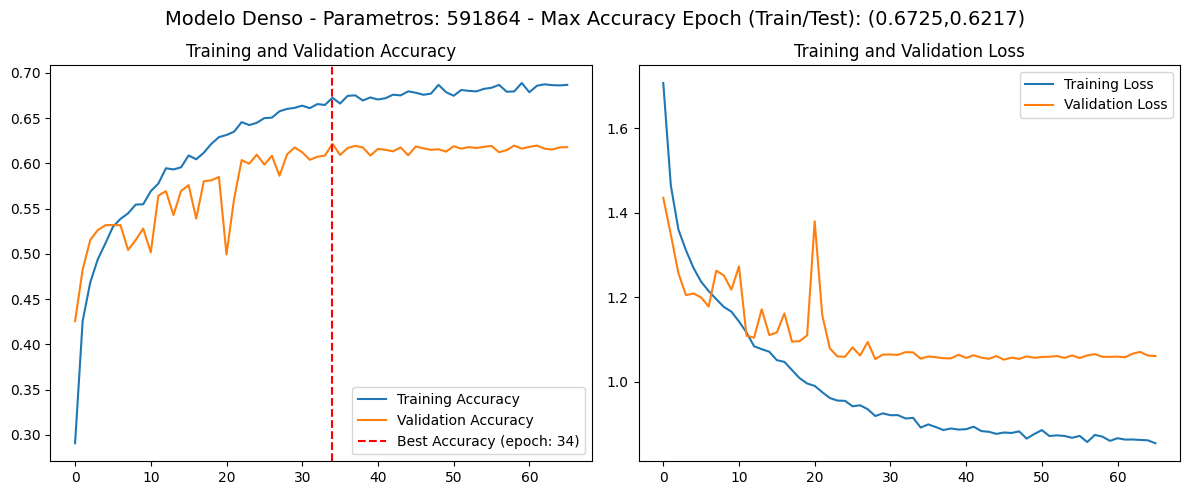

In [17]:
# Grafica la precisión y pérdida de entrenamiento y validación
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))
best_acc_epoch = np.argmax(val_acc)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1 - Accuracy
axs[0].plot(epochs_range, acc, label='Training Accuracy')
axs[0].plot(epochs_range, val_acc, label='Validation Accuracy')
axs[0].axvline(best_acc_epoch, color='red', linestyle='--', label=f'Best Accuracy (epoch: {np.argmax(val_acc)})')
axs[0].legend(loc='lower right')
axs[0].set_title('Training and Validation Accuracy')

# Subplot 2 - Loss
axs[1].plot(epochs_range, loss, label='Training Loss')
axs[1].plot(epochs_range, val_loss, label='Validation Loss')
axs[1].legend(loc='upper right')
axs[1].set_title('Training and Validation Loss')

# Título general opcional
fig.suptitle(f'Modelo Denso - Parametros: {num_params} - Max Accuracy Epoch (Train/Test): ({acc[np.argmax(val_acc)]:.4f},{max(val_acc):.4f})', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.87)
plt.show()

In [25]:
best_model = load_model('best_dense_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


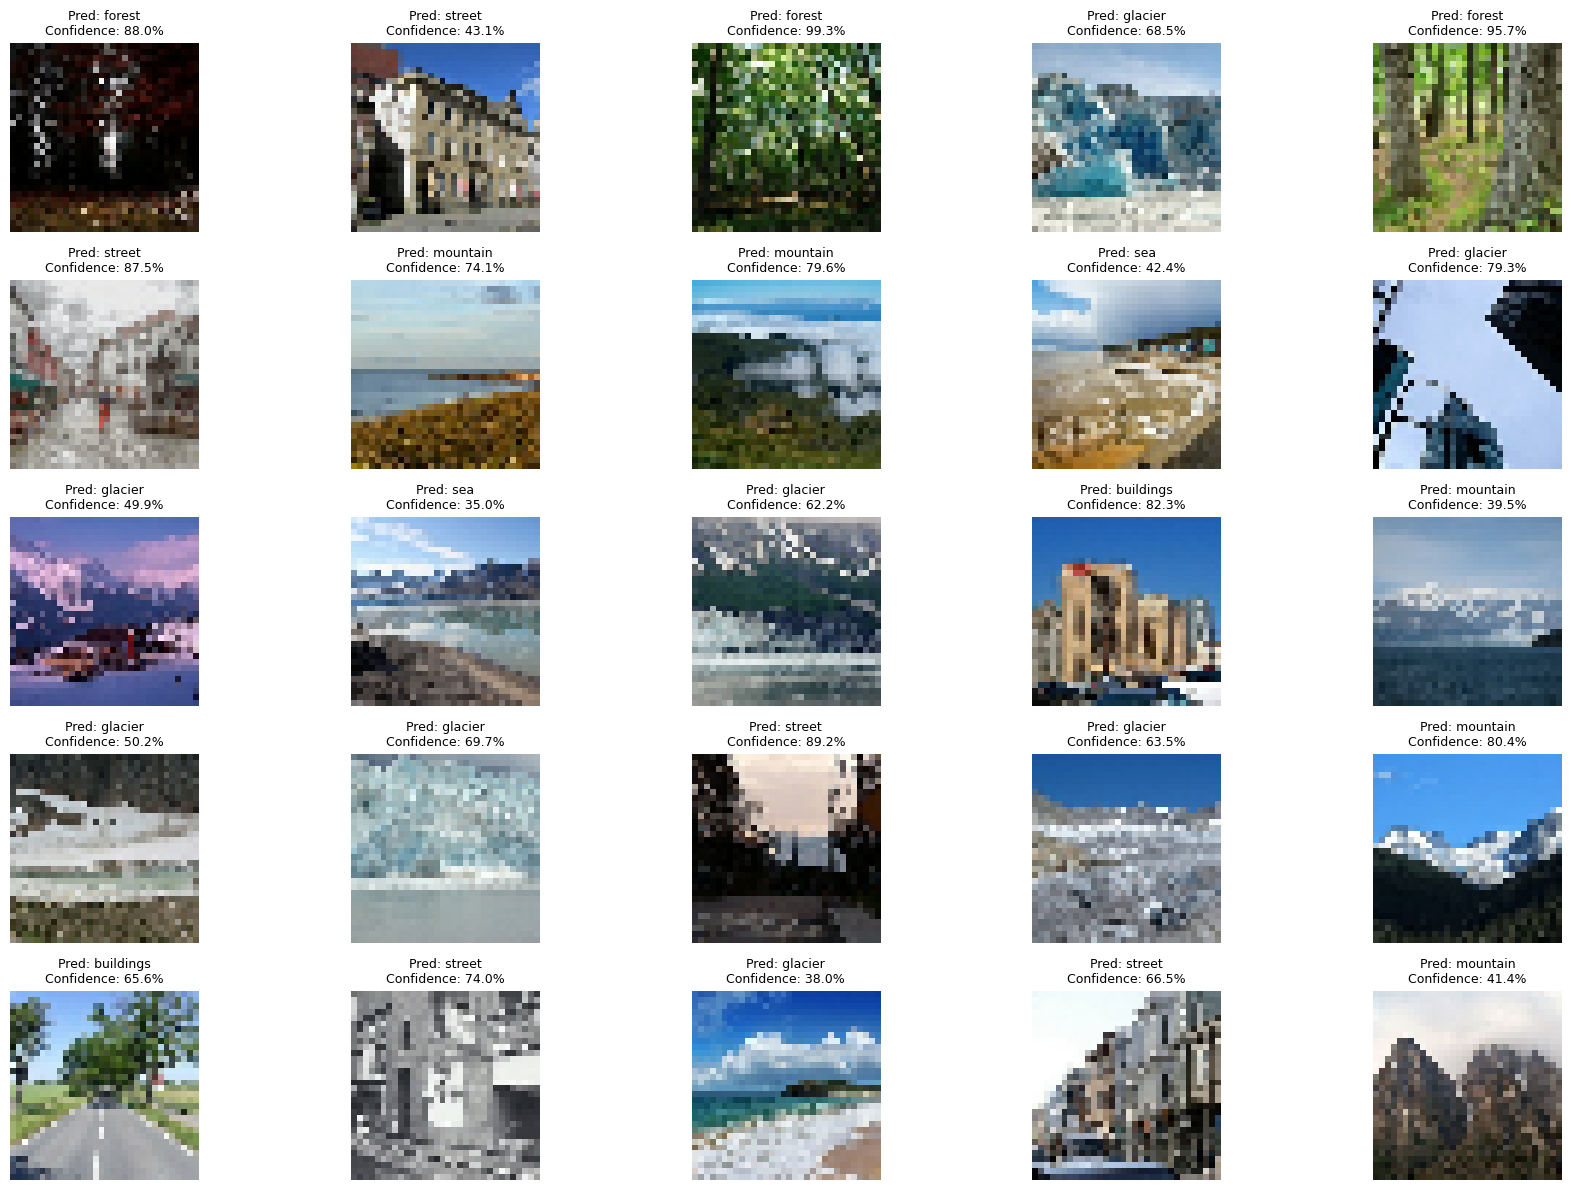

In [26]:
for images in prediction_ds.take(1):
  prediction_images = images[:25]
  true_labels = images[:25]
  break

predictions = best_model.predict(prediction_images)

# Crear subplots
fig, axes = plt.subplots(5, 5, figsize=(18, 12))

for idx, ax in enumerate(axes.flat):
    img = prediction_images[idx].numpy().astype("uint8")
    pred_class = class_names[np.argmax(predictions[idx])]
    confidence = np.max(predictions[idx]) * 100

    ax.imshow(img)
    ax.set_title(f"Pred: {pred_class}\nConfidence: {confidence:.1f}%", fontsize=9)
    ax.axis("off")

plt.tight_layout()
plt.show()